# Epidemic simulation

In this demo, we will work on the Erdos-Renyi (ER, random network) and the scale-free (SF) networks. We will analyse how the spreading of an epidemic changes when the networks undergo errors and attacks. In particular, we will plot the trends of some epidemic features for both ER and SF to compare their topologies' role in obstructing the transmission of the disease. 

First of all, we need to set the variables for the networks generation and the epidemic simulation. 
We also set a random seed for reproducibility.

In [1]:
# Network parameters
N = 100  # Number of nodes
p = 0.04  # Probability of connection between nodes

# Epidemic parameters
mu = 0.2  # Transmission probability
nu = 0.05  # Recovery probability
steps = 50  # Duration of the epidemic simulation
infected_t0 = 1  # Initial number of infected nodes

import numpy as np
import random 

# Reproducibility
seed = 102047
random.seed(seed)
np.random.seed(seed)

Now we can create the two networks.

In [2]:
from network_code import generate_network 
ER = generate_network("ER", N, p)
SF = generate_network("SF", N, p)

We create epidemic simulations for both the ER and the SF networks using the ```EpidemicToleranceSimulation``` class. 

The simulation will work as follows:
1. The network undergoes errors/attacks
2. Points A,B are repeated for `num_simulations` times
    1. A new epidemic spreads                           
    2. Once the epidemic ends, its features are recorded
5. The values of the features from all the epidemic simulations are averaged.
6. Finally, the process comes back to point (1) increasing the number of errors/attacks the network is subjected to.
   
So, the `num_simulations` needs to avoid the randomness due to the stochasticity of the epidemic spreading.

In [3]:
# Simulation setup
num_simulations = 100  # Number of epidemic simulations for each rate of removed nodes
num_points = 15  # Number of data points
max_removal_rate = 0.5 # The maximum portion of nodes that will be removed

from network_code import EpidemicToleranceSimulation

# Create epidemic simulations for both networks
ER_epid_sim = EpidemicToleranceSimulation(ER, mu, nu, steps, infected_t0, max_removal_rate, num_points)
SF_epid_sim = EpidemicToleranceSimulation(SF, mu, nu, steps, infected_t0, max_removal_rate, num_points)


We calculate how the epidemic features vary under node removals (attacks and errors). 

**Note:** This case will plot all the epidemic features implemented by `network_code`, which are:
- ```peak```
- ```t_peak```
- ```epidemic_duration```
- ```total_infected```

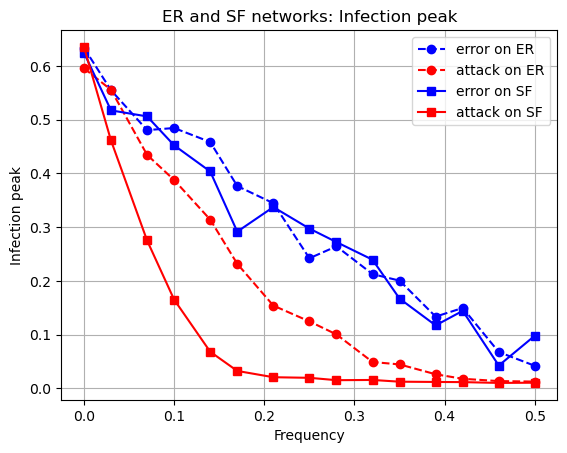

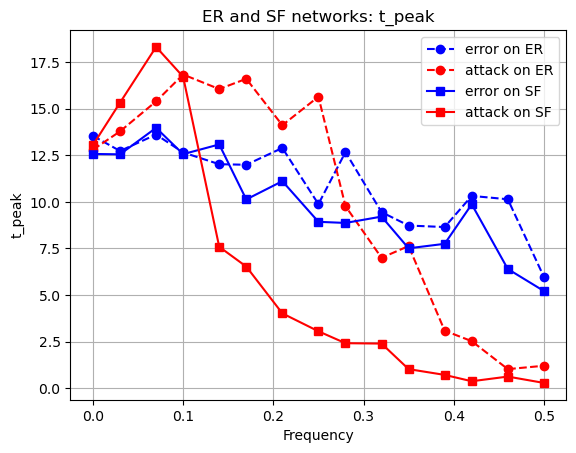

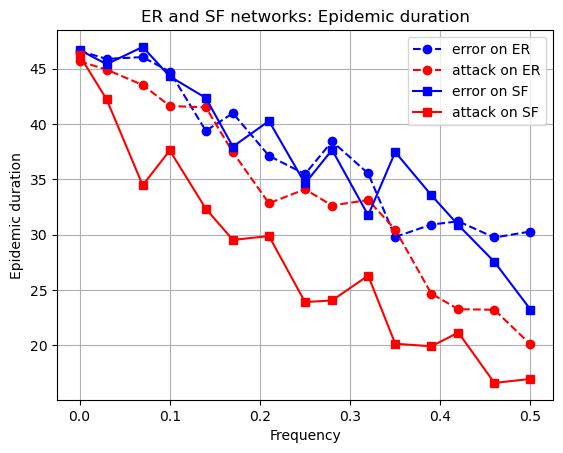

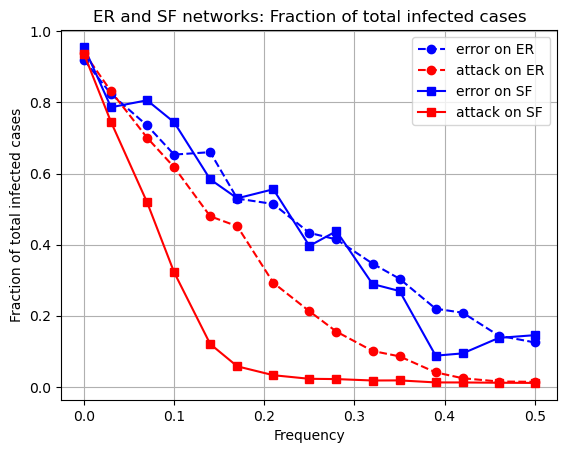

In [4]:
from network_code import epidemic_feature_analysis
from network_code.constants import EPIDEMICS_FUNCS 
from network_code import make_plot_2networks

for key in EPIDEMICS_FUNCS:
    feature = EPIDEMICS_FUNCS[key][0]
    label = EPIDEMICS_FUNCS[key][1]
    
    freq, results_error_ER, results_attack_ER = epidemic_feature_analysis(ER_epid_sim, feature, num_simulations)
    freq, results_error_SF, results_attack_SF = epidemic_feature_analysis(SF_epid_sim, feature, num_simulations)

    fig, ax = make_plot_2networks(freq, 
                                 results_error_ER, results_attack_ER, results_error_SF, results_attack_SF,  
                                 ylabel=f'{label}',
                                 title=f'ER and SF networks: {label}'
                                 )


In the case you just need the plot for a single epidemic feature, then you can avoid the ```for``` cycle by inserting the name of the feature you are interested in into the `key` variable.
Write:
- 'peak'              for the function ```peak``` 
- 't_peak'            for the function ```t_peak```
- 'duration'          for the function ```epidemic_duration```
- 'total_infected'    for the function ```total_infected``` 


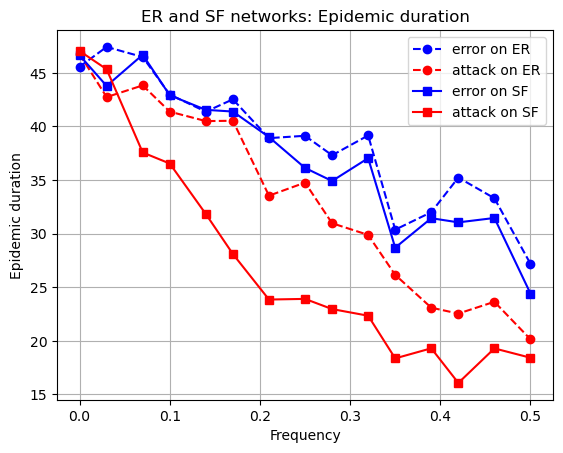

In [5]:
from network_code.constants import EPIDEMICS_FUNCS 
from network_code import epidemic_duration
from network_code import make_plot_2networks

key = 'duration'
feature = EPIDEMICS_FUNCS[key][0]
label = EPIDEMICS_FUNCS[key][1]
    
freq, results_error_ER, results_attack_ER = epidemic_feature_analysis(ER_epid_sim, feature, num_simulations)
freq, results_error_SF, results_attack_SF = epidemic_feature_analysis(SF_epid_sim, feature, num_simulations)

fig, ax = make_plot_2networks(freq, 
                                 results_error_ER, results_attack_ER, results_error_SF, results_attack_SF,  
                                 ylabel=f'{label}',
                                 title=f'ER and SF networks: {label}'
                                 )
